In [37]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

# Нормализация данных
X = X / 255.0

# Преобразование меток в массивы numpy и к типу int
y = y.astype(int)

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=1)

# Проверим размеры полученных выборок
print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (60000, 784)
Размер тестовой выборки: (10000, 784)


In [38]:
# Преобразуем в массив NumPy
X_train = X_train.to_numpy()  
X_test = X_test.to_numpy()
# Преобразование меток в массивы numpy
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# One-hot encoding меток
encoder = OneHotEncoder()
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1)).toarray()

Примеры изображений и меток для тренировочной выборки:


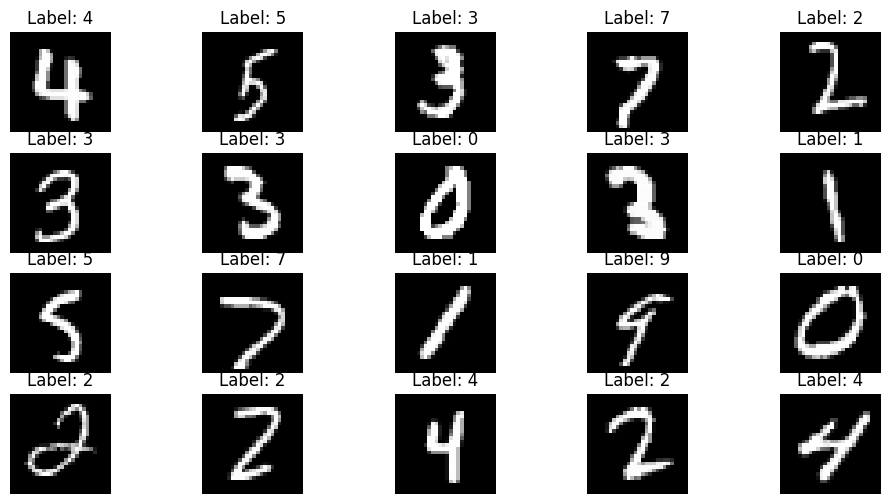

Примеры изображений и меток для тестовой выборки:


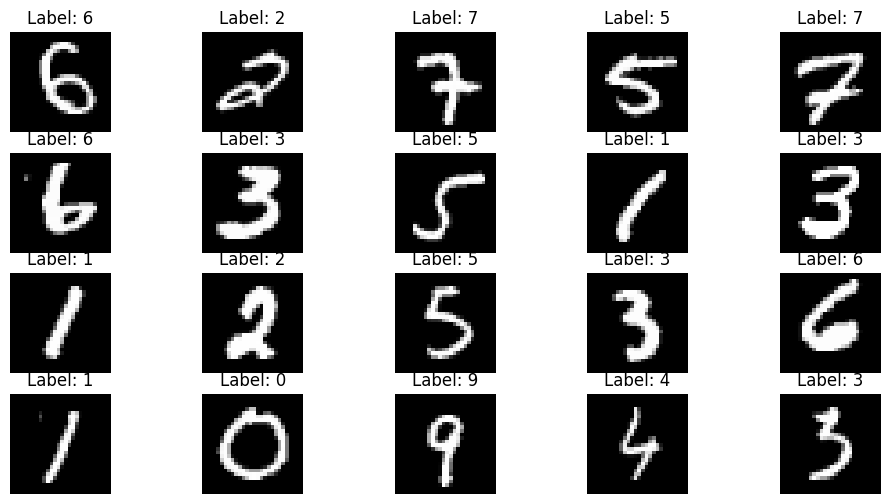

In [39]:
def display_sample_images(X, y, num_images=8):
    plt.figure(figsize=(12, 6))
    for i in range(num_images):
        image = X[i].reshape(28, 28)  
        label = y[i] 
        
        plt.subplot(4, int(num_images/4), i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Label: {label}")
        plt.axis('off')
    plt.show()

print("Примеры изображений и меток для тренировочной выборки:")
display_sample_images(X_train, y_train, num_images=20)
print("Примеры изображений и меток для тестовой выборки:")
display_sample_images(X_test, y_test, num_images=20)

In [40]:
# Установка гиперпараметров
input_size = 784
hidden_layer_size = 300
output_size = 10
learning_rate = 0.1
epochs = 20
batch_size = 64


In [41]:
# Инициализация весов и смещений
weights_input_hidden = np.random.randn(input_size, hidden_layer_size) * np.sqrt(2.0 / input_size)
bias_hidden = np.zeros((1, hidden_layer_size))
weights_hidden_output = np.random.randn(hidden_layer_size, output_size) * np.sqrt(2.0 / hidden_layer_size)
bias_output = np.zeros((1, output_size))

In [42]:
# Функции активации и их производные
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def forward_pass(X):
    z1 = np.dot(X, weights_input_hidden) + bias_hidden
    a1 = relu(z1)
    z2 = np.dot(a1, weights_hidden_output) + bias_output
    a2 = softmax(z2)
    return z1, a1, z2, a2

def compute_loss(y_true, y_pred):
    return -(np.sum(y_true * np.log(y_pred)))/ y_true.shape[0]

def backpropagation(X, y, z1, a1, z2, a2):
    m = X.shape[0]

    dz2 = a2 - y  
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    
    dz1 = np.dot(dz2, weights_hidden_output.T) * relu_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

def update_weights(dW1, db1, dW2, db2, learning_rate):
    global weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
    weights_input_hidden -= learning_rate * dW1
    bias_hidden -= learning_rate * db1
    weights_hidden_output -= learning_rate * dW2
    bias_output -= learning_rate * db2

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [43]:
# Обучение модели
for epoch in range(epochs):
    total_loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train_one_hot[i:i + batch_size]
        z1, a1, z2, a2 = forward_pass(X_batch)
        dW1, db1, dW2, db2 = backpropagation(X_batch, y_batch, z1, a1, z2, a2)

        update_weights(dW1, db1, dW2, db2, learning_rate)
    
        total_loss += compute_loss(y_batch, a2)
    z1, a1, z2, a2 = forward_pass(X_train)
    
    train_accuracy = accuracy(y_train_one_hot, a2)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {train_accuracy:.4f}')

# Тестирование модели
z1, a1, z2, a2 = forward_pass(X_test)
test_accuracy = accuracy(y_test_one_hot, a2)
print(f'Test Accuracy: {test_accuracy:.4f}')

Epoch 1/20, Loss: 333.5344, Accuracy: 0.9375
Epoch 2/20, Loss: 176.0401, Accuracy: 0.9568
Epoch 3/20, Loss: 129.7791, Accuracy: 0.9676
Epoch 4/20, Loss: 103.6295, Accuracy: 0.9743
Epoch 5/20, Loss: 86.1048, Accuracy: 0.9788
Epoch 6/20, Loss: 73.4040, Accuracy: 0.9823
Epoch 7/20, Loss: 63.6527, Accuracy: 0.9848
Epoch 8/20, Loss: 55.9006, Accuracy: 0.9871
Epoch 9/20, Loss: 49.5312, Accuracy: 0.9887
Epoch 10/20, Loss: 44.1828, Accuracy: 0.9902
Epoch 11/20, Loss: 39.6089, Accuracy: 0.9913
Epoch 12/20, Loss: 35.6838, Accuracy: 0.9922
Epoch 13/20, Loss: 32.2449, Accuracy: 0.9931
Epoch 14/20, Loss: 29.2174, Accuracy: 0.9938
Epoch 15/20, Loss: 26.5549, Accuracy: 0.9947
Epoch 16/20, Loss: 24.1767, Accuracy: 0.9953
Epoch 17/20, Loss: 22.0873, Accuracy: 0.9959
Epoch 18/20, Loss: 20.1939, Accuracy: 0.9965
Epoch 19/20, Loss: 18.4935, Accuracy: 0.9969
Epoch 20/20, Loss: 16.9800, Accuracy: 0.9974
Test Accuracy: 0.9786
